In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..', 'modules'))
if module_path not in sys.path:
    sys.path.append(module_path)
import datacollection as dc

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

from matplotlib.ticker import FormatStrFormatter

In [2]:
obs_dic = obs_read = {}

dir = 'C:\\_T_Observations\\data\\FITS'

for filename in os.scandir(dir):
    if filename.is_file():
        spec_no = re.findall(r'\d+', filename.path)
        obs = dc.SalsaFITS(spec_no, filename.path)
        obs_read[obs.longitude] = obs
        
obs_dic = dict(sorted(obs_read.items()))

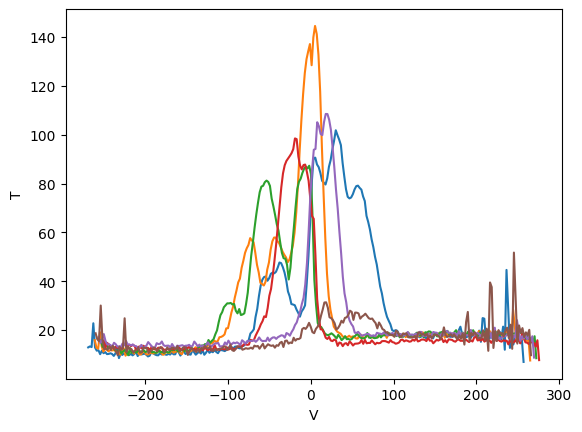

In [3]:
dc.Plots.simple_plot(obs_dic, 40)

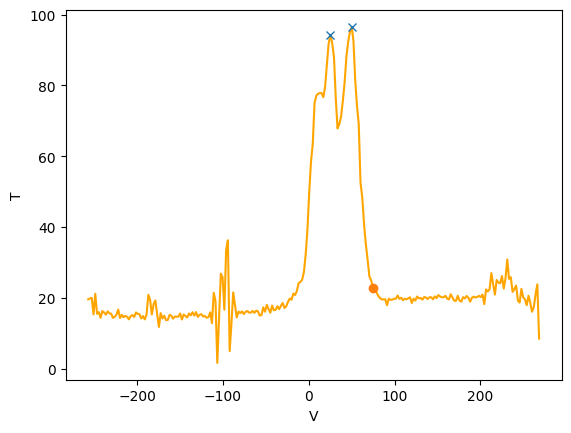

In [4]:
peak_finder_params_test = {'peak_height':20, 'min_prominence':5, 'peak_width':1, 'min_velo':-70, 'max_velo':120, 'minimum_height':-30}
dc.Plots.detail_plot(obs_dic[215], peak_finder_params_test)

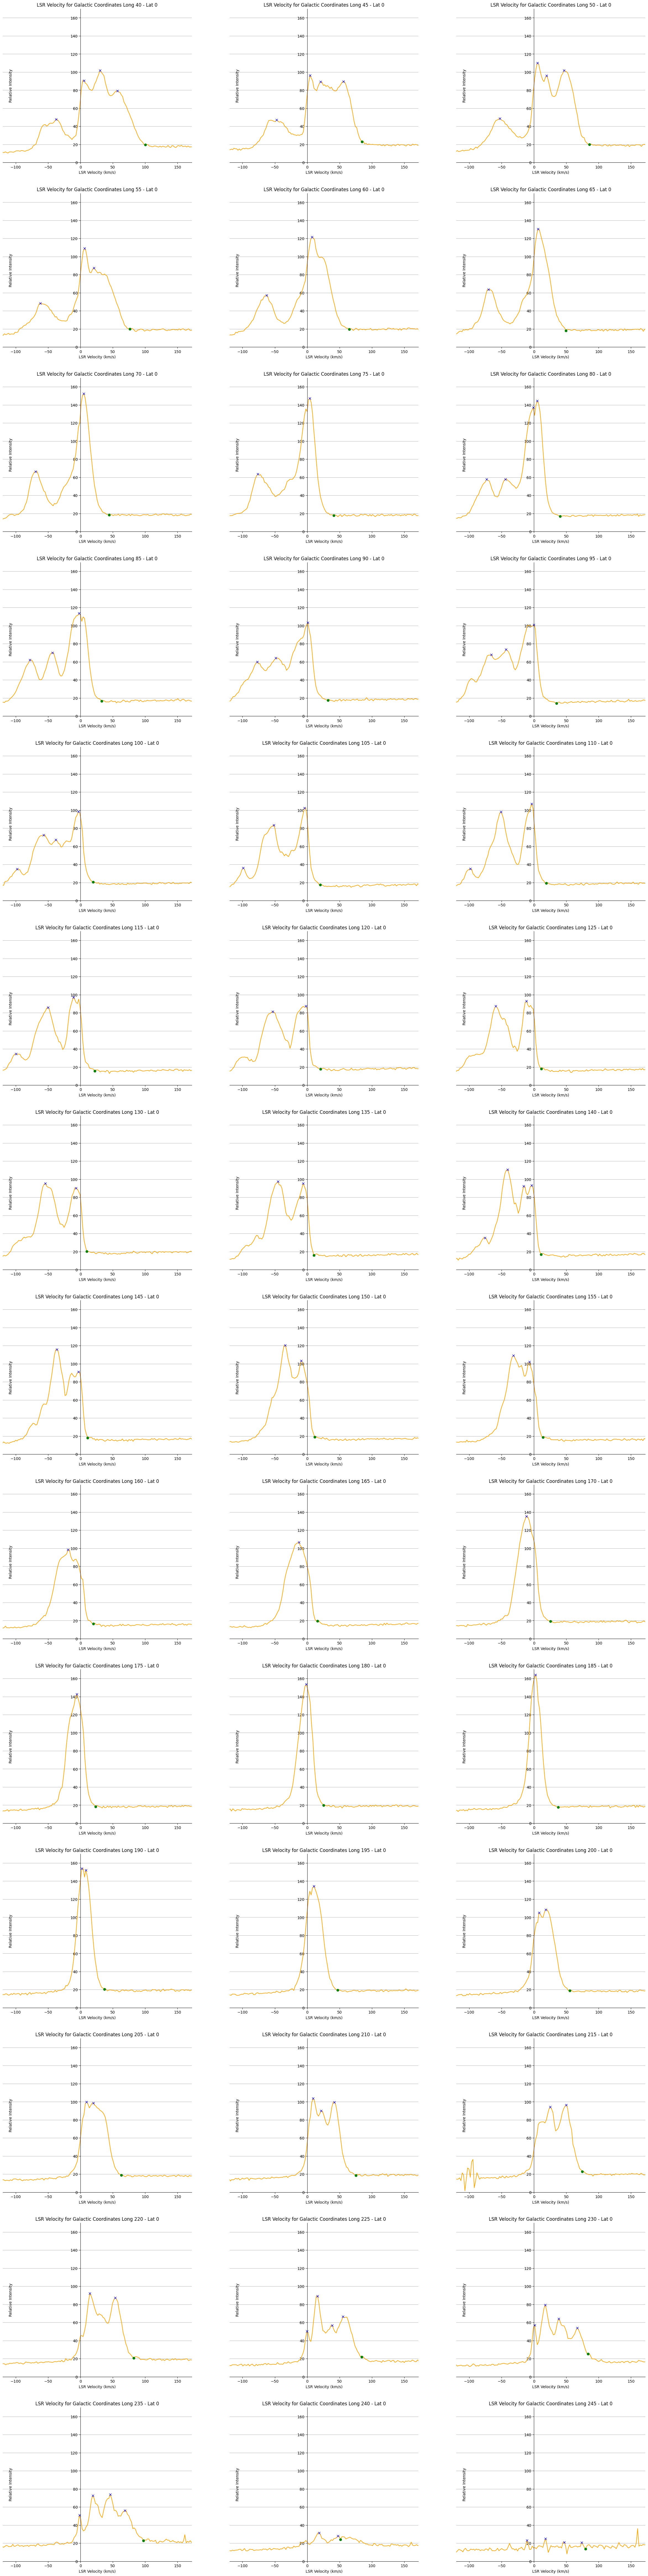

In [5]:
peak_finder_params_0 = {'peak_height':20, 'min_prominence':5, 'peak_width':1, 'min_velo':-200, 'max_velo':120, 'minimum_height':-30}
peak_finder_params_215 = {'peak_height':20, 'min_prominence':5, 'peak_width':1, 'min_velo':-70, 'max_velo':120, 'minimum_height':-30}

peak_finder_params = {
    0:peak_finder_params_0,
    215:peak_finder_params_215
    }

peak_results = dc.Plots.peaks_plots_analysis(obs_dic, 3, peak_finder_params)

In [6]:
peak_results

,longitude,velocity,max_velocity,telescope,instrument,date
0,40,57.045076,100.329274,SALSA 2m,Torre,2024-11-01T18:01:0028
1,40,30.250096,100.329274,SALSA 2m,Torre,2024-11-01T18:01:0028
2,40,5.516269,100.329274,SALSA 2m,Torre,2024-11-01T18:01:0028
3,40,-37.767929,100.329274,SALSA 2m,Torre,2024-11-01T18:01:0028
4,45,55.907284,84.763416,SALSA 2m,Torre,2024-11-01T20:01:0009
...,...,...,...,...,...,...
100,240,18.584312,51.562749,SALSA 2m,Torre,2024-11-14T04:28:0053
101,245,73.654372,79.837828,SALSA 2m,Torre,2024-11-14T04:34:0008
102,245,46.859392,79.837828,SALSA 2m,Torre,2024-11-14T04:34:0008
103,245,18.003259,79.837828,SALSA 2m,Torre,2024-11-14T04:34:0008
